In [1]:
import pandas as pd

data = pd.read_excel("ABS Tech Case _ data.xlsx")
data.to_csv("data.csv")

In [2]:
data_terminated = data.query("Termd == 1")
data_terminated.to_csv("terminated_data.csv")
data_employed = data.query("Termd == 0")
data_employed.to_csv("employed_data.csv")

In [3]:
data.columns

Index(['Employee.Name', 'PerfScore', 'FromDiversityJobFair', 'Salary', 'Termd',
       'PositionID', 'Position', 'State', 'Zip', 'DOB', 'Sex', 'MaritalDesc',
       'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire',
       'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department',
       'ManagerName', 'ManagerID', 'RecruitmentSource', 'EngagementSurvey',
       'EmpSatisfaction', 'SpecialProjectsCount', 'ManPos', 'TechLev',
       'JobStr', 'AssColl', 'AssSelf', 'AssLead', 'TeamIden', 'OrgIden',
       'ConHour', 'CarOpp', 'PsySafe', 'Voice', 'Trust', 'OCB'],
      dtype='object')

In [26]:
print(data.groupby("Department").size())
round(data.groupby("Department")[["PerfScore", "AssColl", "AssSelf", "AssLead", "TechLev", "Termd"]].corr(), 2).dropna()

Department
Admin Offices             9
Executive Office          1
IT/IS                    50
Production              209
Sales                    31
Software Engineering     11
dtype: int64


PerfScore  AssColl  AssSelf  AssLead  TechLev  \
Department                                                                      
Admin Offices        PerfScore       1.00     0.33     0.14     0.55     0.27   
                     AssColl         0.33     1.00    -0.34     0.28     0.35   
                     AssSelf         0.14    -0.34     1.00     0.47     0.14   
                     AssLead         0.55     0.28     0.47     1.00     0.27   
                     TechLev         0.27     0.35     0.14     0.27     1.00   
                     Termd          -0.33    -0.04    -0.87    -0.64    -0.15   
IT/IS                PerfScore       1.00     0.20     0.41     0.40     0.03   
                     AssColl         0.20     1.00     0.03     0.42    -0.22   
                     AssSelf         0.41     0.03     1.00     0.48     0.03   
                     AssLead         0.40     0.42     0.48     1.00    -0.15   
                     TechLev         0.03    -0.22     0.03    -0.15     1.00   
                     Termd          -0.25    -0.35    -0.57    -0.29    -0.12   
Production           PerfScore       1.00     0.34     0.09     0.42     0.08   
                     AssColl         0.34     1.00     0.14     0.49     0.02   
                     AssSelf         0.09     0.14     1.00     0.24     0.03   
                     AssLead         0.42     0.49     0.24     1.00     0.04   
                     TechLev         0.08     0.02     0.03     0.04     1.00   
                     Termd          -0.26    -0.35    -0.36    -0.36    -0.26   
Sales                PerfScore       1.00     0.52     0.43     0.47     0.09   
                     AssColl         0.52     1.00     0.61     0.58     0.02   
                     AssSelf         0.43     0.61     1.00     0.58     0.04   
                     AssLead         0.47     0.58     0.58     1.00     0.12   
                     TechLev         0.09     0.02     0.04     0.12     1.00   
                     Termd          -0.06    -0.23    -0.29    -0.20    -0.55   
Software Engineering PerfScore       1.00     0.35    -0.22     0.35    -0.00   
                     AssColl         0.35     1.00    -0.63     0.19     0.42   
                     AssSelf        -0.22    -0.63     1.00     0.24    -0.17   
                     AssLead         0.35     0.19     0.24     1.00    -0.14   
                     TechLev        -0.00     0.42    -0.17    -0.14     1.00   
                     Termd          -0.66    -0.48     0.20    -0.47    -0.36   

                                Termd  
Department                             
Admin Offices        PerfScore  -0.33  
                     AssColl    -0.04  
                     AssSelf    -0.87  
                     AssLead    -0.64  
                     TechLev    -0.15  
                     Termd       1.00  
IT/IS                PerfScore  -0.25  
                     AssColl    -0.35  
                     AssSelf    -0.57  
                     AssLead    -0.29  
                     TechLev    -0.12  
                     Termd       1.00  
Production           PerfScore  -0.26  
                     AssColl    -0.35  
                     AssSelf    -0.36  
                     AssLead    -0.36  
                     TechLev    -0.26  
                     Termd       1.00  
Sales                PerfScore  -0.06  
                     AssColl    -0.23  
                     AssSelf    -0.29  
                     AssLead    -0.20  
                     TechLev    -0.55  
                     Termd       1.00  
Software Engineering PerfScore  -0.66  
                     AssColl    -0.48  
                     AssSelf     0.20  
                     AssLead    -0.47  
                     TechLev    -0.36  
                     Termd       1.00

In [3]:
data['DateofTermination'].str[-4:].unique()

array([nan, '2020', '2016', '2021', '2019', '2018', '2017', '2015',
       '2022', '2014'], dtype=object)

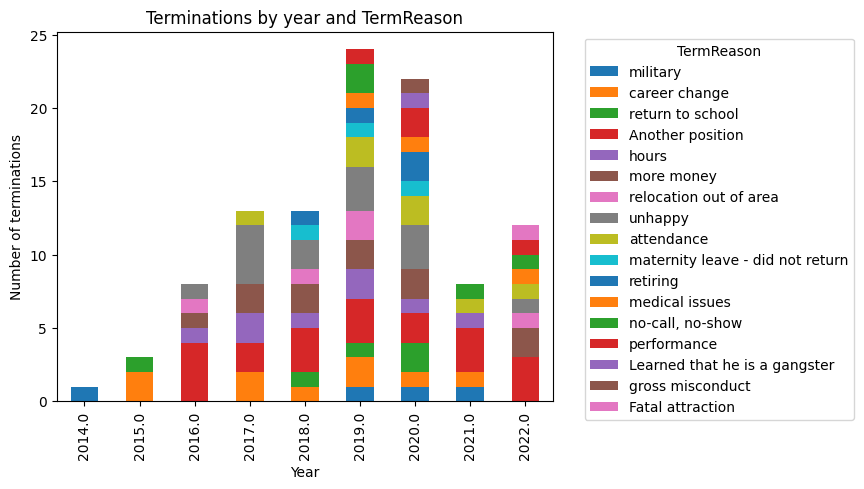

In [4]:
import matplotlib.pyplot as plt

data['DateofTermination'] = pd.to_datetime(data['DateofTermination'], format='%m/%d/%Y')

# Extract the year from the DateofTermination column
data['Year'] = data['DateofTermination'].dt.year

# Group the data by year and TermReason
grouped_data = data.groupby(['Year', 'TermReason']).size().unstack()

# Create a stacked bar chart for each Year
grouped_data.plot(kind='bar', stacked=True)

# Add axis labels and title
plt.xlabel('Year')
plt.ylabel('Number of terminations')
plt.title('Terminations by year and TermReason')
plt.legend(title='TermReason', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [24]:
data.TermReason.unique()

array(['N/A-StillEmployed', 'career change', 'hours', 'return to school',
       'Another position', 'unhappy', 'attendance', 'performance',
       'Learned that he is a gangster', 'retiring',
       'relocation out of area', 'more money', 'military',
       'no-call, no-show', 'Fatal attraction',
       'maternity leave - did not return', 'medical issues',
       'gross misconduct'], dtype=object)